In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features_matrix = np.load("./continents_new_features.npz")["arr_0"]
features_matrix.shape

(770, 10, 2)

In [3]:
flights_matrix = np.load("./continents_flight_zero_diag.npz")["arr_0"]
flights_matrix.shape

(999, 10, 10)

In [4]:
flights_matrix[600,:5,:5]

array([[3.7000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [2.0000e+00, 2.6502e+04, 3.2000e+01, 6.0000e+00, 4.0000e+00],
       [0.0000e+00, 3.3000e+01, 2.2700e+02, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 5.0000e+00, 0.0000e+00, 1.0880e+03, 0.0000e+00],
       [0.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00, 5.0700e+02]])

In [5]:
continents = ["Africa", "North America", "South America", "Oceania", "Eastern Europe", "Western Europe", "Middle East", "South Asia", "Southeast-East Asia", "Central Asia"]

# Sync two matrices
March 1st, 2020 to September 30th, 2021

In [6]:
features_matrix[616,:,1]

array([ 13595., 136389.,  28620.,   2716.,  57621.,  89430.,  54579.,
        30943.,  68889.,   6377.])

In [7]:
flights_matrix[424,0:10,0:5]

array([[1.0200e+02, 6.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00],
       [6.0000e+00, 3.0786e+04, 7.9000e+01, 3.5000e+01, 2.2000e+01],
       [3.0000e+00, 7.1000e+01, 4.7000e+02, 1.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.5000e+01, 0.0000e+00, 2.4070e+03, 0.0000e+00],
       [0.0000e+00, 1.8000e+01, 0.0000e+00, 0.0000e+00, 4.9400e+02],
       [8.3000e+01, 5.1800e+02, 5.4000e+01, 1.0000e+00, 8.5500e+02],
       [1.5000e+01, 4.2000e+01, 2.0000e+00, 1.1000e+01, 9.7000e+01],
       [1.0000e+00, 1.2000e+01, 0.0000e+00, 3.0000e+00, 5.0000e+00],
       [2.0000e+00, 9.9000e+01, 1.0000e+00, 9.5000e+01, 1.2000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5000e+01]])

In [8]:
# Indexes in features matrix: 38 to 616
# Indexes in flights matrix: 424 to 998

synced_feature_matrix = features_matrix[38:616]
synced_flights_matrix = flights_matrix[424:998]

print(synced_feature_matrix.shape)
print(synced_flights_matrix.shape)

(578, 10, 2)
(574, 10, 10)


In [9]:
# Missing Day in Flight Matrix  -  Index of that day in features matrix, need to delete
# 3/14/2021 - 378
# 5/31/2021 - 456
# 9/4/2021 - 552
# 9/29/2021 - 577

In [10]:
synced_feature_matrix[577,:,1]

array([ 16022., 149501.,  24769.,   3224.,  52754.,  92285.,  51854.,
        28459.,  64094.,   7539.])

In [11]:
synced_feature_matrix = np.delete(synced_feature_matrix, [378, 456, 552, 577], axis=0)

In [12]:
print(synced_feature_matrix.shape)
print(synced_flights_matrix.shape)

(574, 10, 2)
(574, 10, 10)


# Check Node Features for nans, negatives, and prevalence of 0s

In [13]:
np.where(synced_feature_matrix == np.nan)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [14]:
np.where(synced_feature_matrix < 0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [15]:
np.where(synced_feature_matrix == 0)  # A few regions reported 0 overall cases in March 2020

(array([ 0,  1,  1,  2,  2,  3,  5,  6, 11, 84]),
 array([7, 2, 9, 7, 9, 9, 9, 0, 3, 3]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

# Check Flight Matrix For Zeros

In [16]:
flight_zeros_loc = np.where(synced_flights_matrix == 0)
len(flight_zeros_loc[0])

18232

In [17]:
flight_zeros_loc

(array([  0,   0,   0, ..., 573, 573, 573]),
 array([0, 0, 1, ..., 9, 9, 9]),
 array([7, 9, 9, ..., 7, 8, 9]))

If want to test fully connected adjacency, run this cell

In [18]:
# synced_flights_matrix += 10

In [19]:
# flight_zeros_loc = np.where(synced_flights_matrix == 0)
# flight_zeros_loc

# Remove self-connections in flight dataset

In [20]:
synced_flights_matrix.shape

(574, 10, 10)

In [21]:
for idx in range(10):
    synced_flights_matrix[:,idx,idx] = 0

In [22]:
flight_zeros_loc = np.where(synced_flights_matrix == 0)
print(len(flight_zeros_loc[0]))

23854


In [23]:
synced_flights_matrix[100,:5,:5]

array([[ 0.,  0.,  2.,  0.,  0.],
       [ 1.,  0., 25.,  5.,  7.],
       [ 1., 20.,  0.,  0.,  0.],
       [ 0.,  8.,  0.,  0.,  0.],
       [ 1.,  9.,  0.,  0.,  0.]])

Reset variable names

In [24]:
feature_matrix = synced_feature_matrix
flights_matrix = synced_flights_matrix

print(feature_matrix.shape)
print(flights_matrix.shape)

(574, 10, 2)
(574, 10, 10)


# Split into Train/Validation/Test Splits

In [25]:
val_test_split_idx = int(len(feature_matrix) * 0.8)
train_val_split_idx = int(val_test_split_idx * 0.8)

print(train_val_split_idx)
print(val_test_split_idx)

367
459


In [26]:
train_feat_matrix = feature_matrix[:train_val_split_idx, :, :]
train_flight_matrix = flights_matrix[:train_val_split_idx, :, :]
val_feat_matrix = feature_matrix[train_val_split_idx:val_test_split_idx, :, :]
val_flight_matrix = flights_matrix[train_val_split_idx:val_test_split_idx, :, :]
test_feat_matrix = feature_matrix[val_test_split_idx:, :, :]
test_flight_matrix = flights_matrix[val_test_split_idx:, :, :]

print(train_feat_matrix.shape)
print(train_flight_matrix.shape)
print(val_feat_matrix.shape)
print(val_flight_matrix.shape)
print(test_feat_matrix.shape)
print(test_flight_matrix.shape)

(367, 10, 2)
(367, 10, 10)
(92, 10, 2)
(92, 10, 10)
(115, 10, 2)
(115, 10, 10)


# Smoothen Covid Cases Feature

In [27]:
smoothening_window = 7

(360, 10, 2)


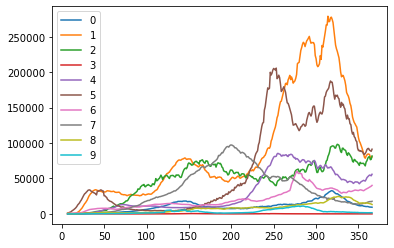

In [28]:
# Smoothen Training Dataset
train_feature_matrix_df = pd.DataFrame(train_feat_matrix[:,:,1])
train_rolling_win_df = train_feature_matrix_df.rolling(window=smoothening_window + 1).mean()
train_rolling_win_df.dropna(inplace=True)
train_rolling_win_df.plot()
train_rolling_win_df_np = train_rolling_win_df.values

# Delete first 14 days from feature and flight datasets
train_feat_matrix = train_feat_matrix[smoothening_window:,:,:]
train_flight_matrix = train_flight_matrix[smoothening_window:,:,:]

# Overlay moving averages onto matrix that will be saved
train_feat_matrix[:,:,1] = train_rolling_win_df_np
print(train_feat_matrix.shape)

(85, 10, 2)


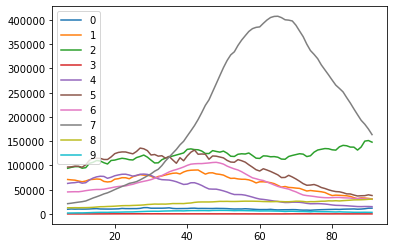

In [29]:
# Smoothen Validation Dataset
val_feature_matrix_df = pd.DataFrame(val_feat_matrix[:,:,1])
val_rolling_win_df = val_feature_matrix_df.rolling(window=smoothening_window + 1).mean()
val_rolling_win_df.dropna(inplace=True)
val_rolling_win_df.plot()
val_rolling_win_df_np = val_rolling_win_df.values

# Delete first 14 days from feature and flight datasets
val_feat_matrix = val_feat_matrix[smoothening_window:,:,:]
val_flight_matrix = val_flight_matrix[smoothening_window:,:,:]

# Overlay moving averages onto matrix that will be saved
val_feat_matrix[:,:,1] = val_rolling_win_df_np
print(val_feat_matrix.shape)

(108, 10, 2)


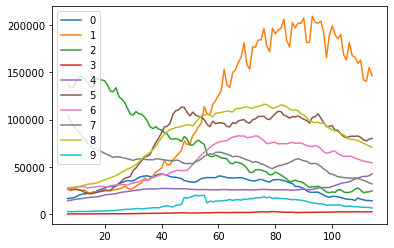

In [30]:
# Smoothen Test Dataset
test_feature_matrix_df = pd.DataFrame(test_feat_matrix[:,:,1])
test_rolling_win_df = test_feature_matrix_df.rolling(window=smoothening_window + 1).mean()
test_rolling_win_df.dropna(inplace=True)
test_rolling_win_df.plot()
test_rolling_win_df_np = test_rolling_win_df.values

# Delete first 14 days from feature and flight datasets
test_feat_matrix = test_feat_matrix[smoothening_window:,:,:]
test_flight_matrix = test_flight_matrix[smoothening_window:,:,:]

# Overlay moving averages onto matrix that will be saved
test_feat_matrix_smooth = np.copy(test_feat_matrix)
test_feat_matrix_smooth[:,:,1] = test_rolling_win_df_np
print(test_feat_matrix_smooth.shape)

# Scale Adjacency Matrix

In [31]:
train_unscaled_flight_matrix = np.copy(train_flight_matrix)
val_unscaled_flight_matrix = np.copy(val_flight_matrix)
test_unscaled_flight_matrix = np.copy(test_flight_matrix)
print(train_unscaled_flight_matrix.shape)
print(val_unscaled_flight_matrix.shape)
print(test_unscaled_flight_matrix.shape)

(360, 10, 10)
(85, 10, 10)
(108, 10, 10)


In [32]:
print(train_unscaled_flight_matrix.max())
print(train_unscaled_flight_matrix.min())
print(val_unscaled_flight_matrix.max())
print(val_unscaled_flight_matrix.min())
print(test_unscaled_flight_matrix.max())
print(test_unscaled_flight_matrix.min())

897.0
0.0
537.0
0.0
815.0
0.0


In [33]:
print(len(np.where(train_flight_matrix == 0)[0]))
print(len(np.where(val_flight_matrix == 0)[0]))
print(len(np.where(test_flight_matrix == 0)[0]))

15400
3337
4351


In [34]:
# Important: replaces 1s and 1.1s so that zeros are not introduced by log10 transformation of flight weights. That would affect edge creation in graph networks
train_flight_matrix[train_flight_matrix == 1] = 1.1
for roll_win in range(len(train_flight_matrix)):
    for row_idx in range(len(train_flight_matrix[roll_win])):
        for col_idx in range(len(train_flight_matrix[roll_win][row_idx])):
            if train_flight_matrix[roll_win][row_idx][col_idx] > 0:
                train_flight_matrix[roll_win][row_idx][col_idx] = np.log10(train_flight_matrix[roll_win][row_idx][col_idx])

val_flight_matrix[val_flight_matrix == 1] = 1.1
for roll_win in range(len(val_flight_matrix)):
    for row_idx in range(len(val_flight_matrix[roll_win])):
        for col_idx in range(len(val_flight_matrix[roll_win][row_idx])):
            if val_flight_matrix[roll_win][row_idx][col_idx] > 0:
                val_flight_matrix[roll_win][row_idx][col_idx] = np.log10(val_flight_matrix[roll_win][row_idx][col_idx])

test_flight_matrix[test_flight_matrix == 1] = 1.1
for roll_win in range(len(test_flight_matrix)):
    for row_idx in range(len(test_flight_matrix[roll_win])):
        for col_idx in range(len(test_flight_matrix[roll_win][row_idx])):
            if test_flight_matrix[roll_win][row_idx][col_idx] > 0:
                test_flight_matrix[roll_win][row_idx][col_idx] = np.log10(test_flight_matrix[roll_win][row_idx][col_idx])

In [35]:
print(len(np.where(train_flight_matrix == 0)[0]))
print(len(np.where(val_flight_matrix == 0)[0]))
print(len(np.where(test_flight_matrix == 0)[0]))

15400
3337
4351


In [36]:
print(train_flight_matrix.max())
print(train_flight_matrix.min())
print(val_flight_matrix.max())
print(val_flight_matrix.min())
print(test_flight_matrix.max())
print(test_flight_matrix.min())

2.952792443044092
0.0
2.7299742856995555
0.0
2.9111576087399764
0.0


Check that outgoing flights are log10 scaled

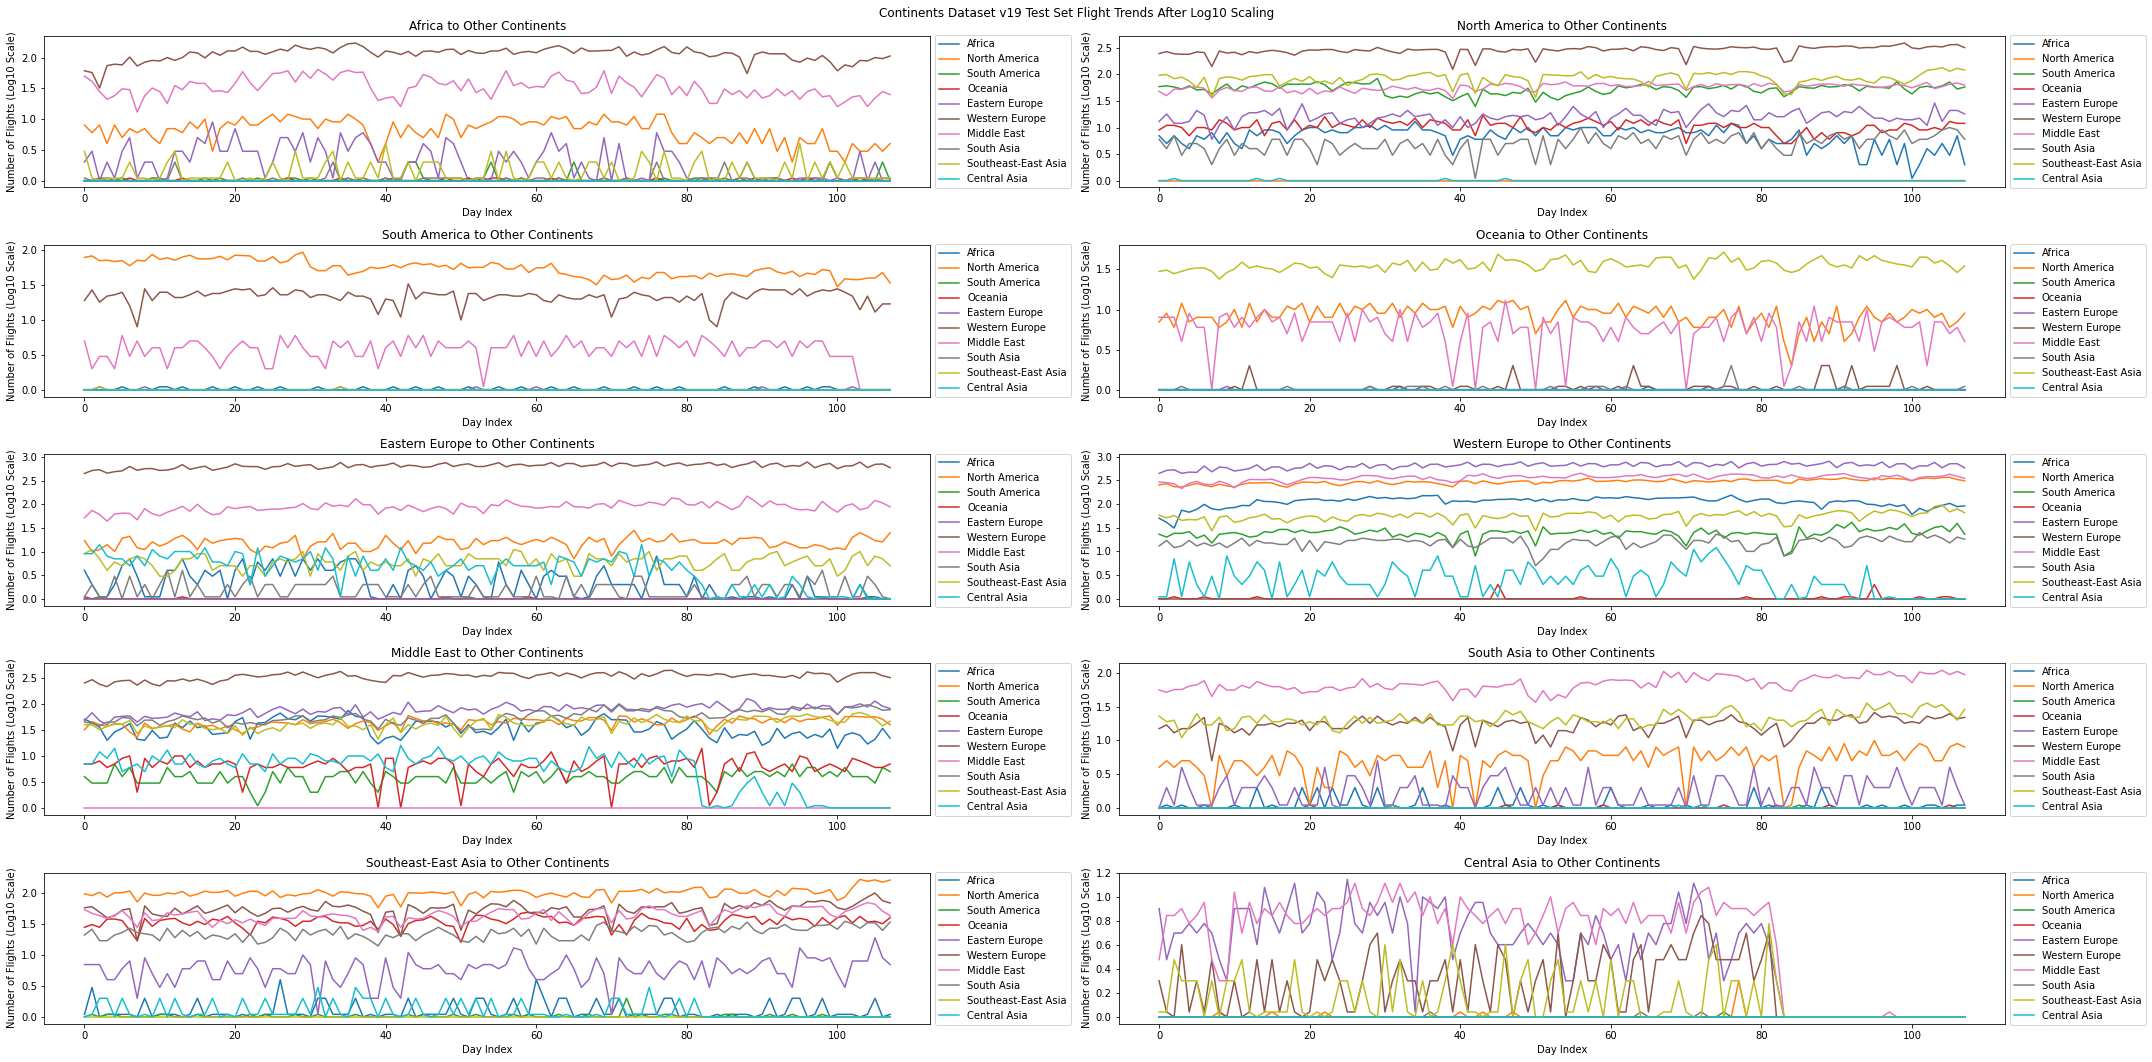

In [37]:
sns.reset_orig()
plt.figure(figsize=(30, 15))
for j in range(10):
    ax = plt.subplot(5,2,j+1)
    for i in range(10):
        if i != j:
            # train_flight_matrix val_flight_matrix test_flight_matrix
            # train_unscaled_flight_matrix val_unscaled_flight_matrix test_unscaled_flight_matrix
            plt.plot(test_flight_matrix[:,j,i], label=continents[i])
        else:
            plt.plot(np.zeros((len(test_flight_matrix))), label=continents[i])
    plt.title(continents[j] + " to Other Continents")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.ylim(0.0, 3.0)
    plt.xlabel('Day Index')  
    plt.ylabel('Number of Flights (Log10 Scale)')

plt.suptitle("Continents Dataset v19 Test Set Flight Trends After Log10 Scaling")
plt.tight_layout()
# plt.savefig("./continents_v19_test_flight_trends_log10_7day_smoothened.png", facecolor="white", bbox_inches="tight")
plt.show()

# Log Transform Covid Cases and Containment Index Features

In [38]:
print(train_feat_matrix[:,:,1].max())
print(train_feat_matrix[:,:,1].min())
print(val_feat_matrix[:,:,1].max())
print(val_feat_matrix[:,:,1].min())
print(train_feat_matrix[:,:,1].max())
print(train_feat_matrix[:,:,1].min())
print(test_feat_matrix_smooth[:,:,1].max())
print(test_feat_matrix_smooth[:,:,1].min())

278795.75
2.25
407679.0
80.625
278795.75
2.25
209526.5
127.0


In [39]:
for i in range(train_feat_matrix[:,:,1].shape[0]):
    for j in range(train_feat_matrix[:,:,1].shape[1]):
        if train_feat_matrix[i][j][1] > 0:
            train_feat_matrix[i][j][1] = np.log10(train_feat_matrix[i][j][1])
        train_feat_matrix[i][j][0] = np.log10(train_feat_matrix[i][j][0])

for i in range(val_feat_matrix[:,:,1].shape[0]):
    for j in range(val_feat_matrix[:,:,1].shape[1]):
        if val_feat_matrix[i][j][1] > 0:
            val_feat_matrix[i][j][1] = np.log10(val_feat_matrix[i][j][1])
        val_feat_matrix[i][j][0] = np.log10(val_feat_matrix[i][j][0])

for i in range(test_feat_matrix[:,:,1].shape[0]):
    for j in range(test_feat_matrix[:,:,1].shape[1]):
        if test_feat_matrix[i][j][1] > 0:
            test_feat_matrix[i][j][1] = np.log10(test_feat_matrix[i][j][1])
        test_feat_matrix[i][j][0] = np.log10(test_feat_matrix[i][j][0])

for i in range(test_feat_matrix_smooth[:,:,1].shape[0]):
    for j in range(test_feat_matrix_smooth[:,:,1].shape[1]):
        if test_feat_matrix_smooth[i][j][1] > 0:
            test_feat_matrix_smooth[i][j][1] = np.log10(test_feat_matrix_smooth[i][j][1])
        test_feat_matrix_smooth[i][j][0] = np.log10(test_feat_matrix_smooth[i][j][0])

In [40]:
print(train_feat_matrix[:,:,1].max())
print(train_feat_matrix[:,:,1].min())
print(val_feat_matrix[:,:,1].max())
print(val_feat_matrix[:,:,1].min())
print(test_feat_matrix[:,:,1].max())
print(test_feat_matrix[:,:,1].min())
print(test_feat_matrix_smooth[:,:,1].max())
print(test_feat_matrix_smooth[:,:,1].min())

5.4452861490328
0.3521825181113625
5.610318341035156
1.9064697276433242
5.46583178691403
1.9444826721501687
5.321238958452424
2.103803720955957


# Save Dataset

In [41]:
print(train_flight_matrix.max())
print(train_unscaled_flight_matrix.max())
print(val_flight_matrix.max())
print(val_unscaled_flight_matrix.max())
print(test_flight_matrix.max())
print(test_unscaled_flight_matrix.max())

2.952792443044092
897.0
2.7299742856995555
537.0
2.9111576087399764
815.0


In [42]:
test_flight_matrix[72,:5,:5]

array([[0.        , 0.90308999, 0.04139269, 0.        , 0.        ],
       [0.95424251, 0.        , 1.77085201, 1.04139269, 1.34242268],
       [0.        , 1.64345268, 0.        , 0.        , 0.        ],
       [0.        , 0.77815125, 0.        , 0.        , 0.        ],
       [0.30103   , 1.30103   , 0.        , 0.        , 0.        ]])

In [43]:
np.savez('./10_continents_dataset_v19_training',
    train_features_log10=train_feat_matrix,
    train_log10_scaled_flight_matrix=train_flight_matrix,
    train_unscaled_flight_matrix=train_unscaled_flight_matrix,
    val_features_log10=val_feat_matrix,
    val_log10_scaled_flight_matrix=val_flight_matrix,
    val_unscaled_flight_matrix=val_unscaled_flight_matrix,
    test_features_log10_unsmooth=test_feat_matrix,
    test_features_log10_smooth=test_feat_matrix_smooth,
    test_log10_scaled_flight_matrix=test_flight_matrix,
    test_unscaled_flight_matrix=test_unscaled_flight_matrix,
)